In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('banknotes.csv')

In [5]:
x=df.drop('Class',axis=1)

In [7]:
y=df['Class']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [22]:
x_train

,Variance,Skewness,Curtosis,Entropy
662,2.97360,8.794400,-3.635900,-1.375400
512,2.66480,10.754000,-3.399400,-4.168500
1193,-3.75730,-8.291600,10.303200,0.380590
682,3.73210,-3.884000,3.357700,-0.006049
1313,-1.50780,-7.319100,7.898100,1.228900
...,...,...,...,...
763,0.39012,-0.142790,-0.031994,0.350840
835,-0.94255,0.039307,-0.241920,0.315930
1216,0.60050,0.999450,-2.212600,0.097399
559,2.01650,-0.252460,5.170700,1.076300


##### Build the model

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
clf_rf=RandomForestClassifier(random_state=0,n_estimators=10)

In [25]:
clf_rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [26]:
y_pred=clf_rf.predict(x_train)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay 

In [31]:
y_test.value_counts()

Class
0    195
1    148
Name: count, dtype: int64

In [30]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       195
           1       0.99      1.00      0.99       148

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [29]:
accuracy_score(y_test,y_pred)

0.9941690962099126

In [32]:
clf_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035)]

In [33]:
from sklearn.tree import plot_tree

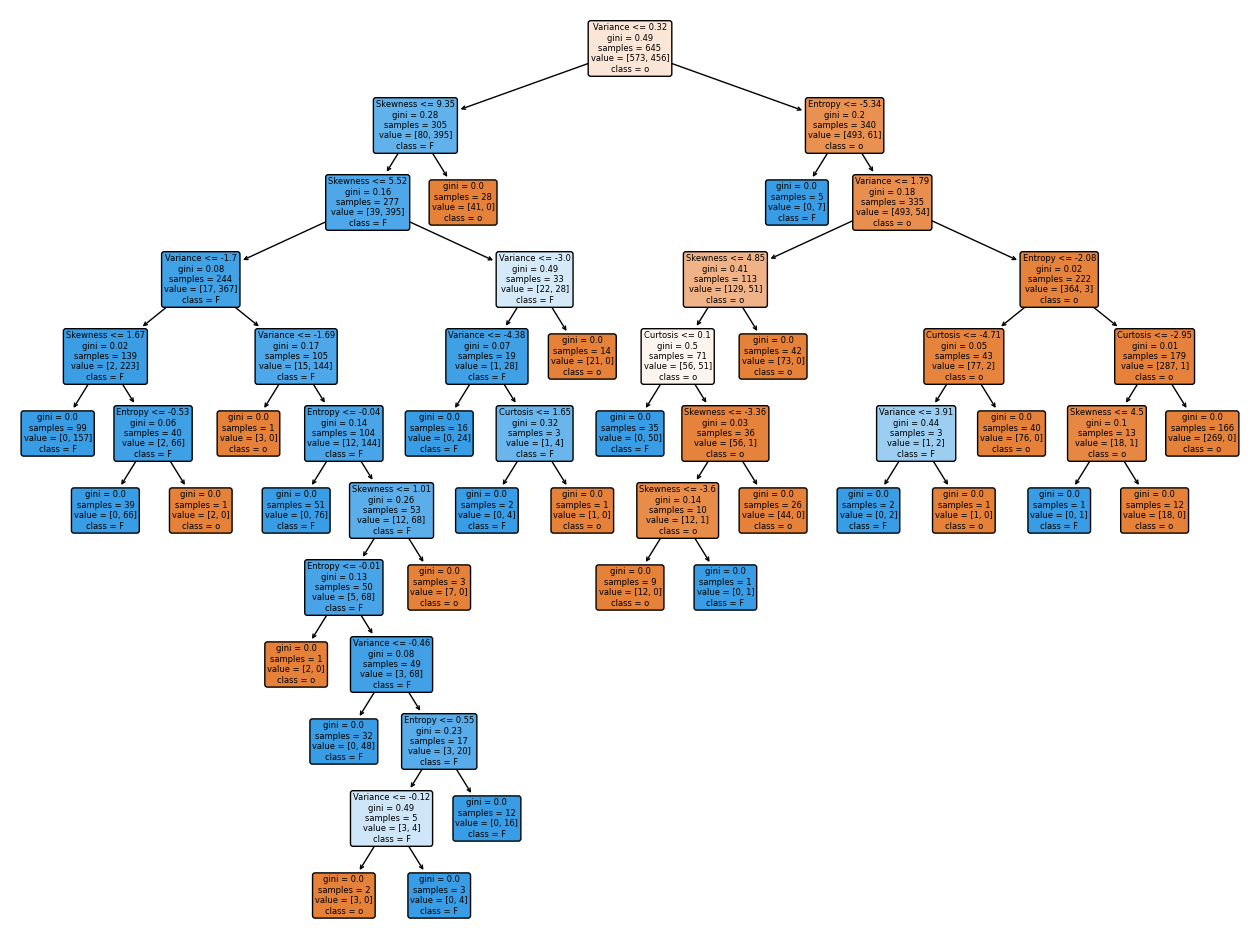

In [34]:
plt.figure(figsize= (16,12))
plot_tree(clf_rf.estimators_[3],fontsize=6, feature_names=x.columns,
          filled=True,precision=2,class_names=['o','F'],
          rounded=True);


In [37]:
from sklearn.tree import DecisionTreeClassifier
clf_tree=DecisionTreeClassifier(random_state=0)

In [38]:
%%time
clf_rf.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 22 ms


RandomForestClassifier(n_estimators=10, random_state=0)

In [40]:
%%time
clf_tree.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 4 ms


DecisionTreeClassifier(random_state=0)

In [41]:
import time

In [43]:
time.time()  ## more acurate for time 


1720681391.2297893

In [44]:
time.asctime()

'Thu Jul 11 12:35:24 2024'

In [45]:
start=time.time()
print('hello word')
end=time.time()

hello word


In [46]:
end-start

0.0010018348693847656

In [48]:
###### trening time
start=time.time()
clf_tree.fit(x_train,y_train)
end=time.time()
print('Decision Tree:',end-start)

start=time.time()
clf_rf.fit(x_train,y_train)
end=time.time()
print('random Forest:',end-start)

Decision Tree: 0.004998922348022461
random Forest: 0.029001235961914062
